In [1]:
from collections import defaultdict
import os
import json
import sys
from decentralizepy.graphs.MobilityGraph import MobilityGraph
import numpy as np
import matplotlib.pyplot as plt    

from animate_graph import find_last_graph_file


def average_of_first_percent(lst, p):
    n = int(len(lst) * p)
    return np.mean(lst[:n])

def average_of_last_percent(lst, p):
    n = int(len(lst) * p)
    return np.mean(lst[-n:])

num_nodes = 48
# rounds_cutoff = float('inf')
rounds_cutoff = 200
graphs_dir = ".sim"
high_mobility_proportion = 0.8

def high_mobility_nodes(g: MobilityGraph):
    n = int(len(g.nodes) * high_mobility_proportion)
    return g.nodes[:n]

def low_mobility_nodes(g: MobilityGraph):  
    n_low = int(len(g.nodes) * high_mobility_proportion)
    return g.nodes[n_low:]

graphs: list[MobilityGraph] = []
last_graph_file_number = find_last_graph_file(graphs_dir)
for i in range(1, last_graph_file_number + 1):
    file_path = os.path.join(graphs_dir, f"graph_{i}.txt")
    if os.path.exists(file_path):
        g = MobilityGraph()
        g.read_graph_from_file(file_path)
        graphs.append(g)
    else:
        print(f"File graph_{i}.txt does not exist in the directory.")
        sys.exit(1)

n = len(graphs)
high_mobility_neighbors = [defaultdict(set) for _ in range(n)]
low_mobility_neighbors = [defaultdict(set) for _ in range(n)]

for (i, g) in enumerate(graphs):
    h_nodes = high_mobility_nodes(g)
    l_nodes = low_mobility_nodes(g)

    print("High mobility nodes:", [node.uid for node in h_nodes])
    print("High mobility nodes velocities:", [node.velocity for node in h_nodes])
    print("Low mobility nodes:", [node.uid for node in l_nodes])
    print("Low mobility nodes velocities:", [node.velocity for node in l_nodes])

    for node in h_nodes:
        high_mobility_neighbors[i][node.uid] = set(g.neighbors(node.uid))
    
    for node in l_nodes:
        low_mobility_neighbors[i][node.uid] = set(g.neighbors(node.uid))
    


High mobility nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
High mobility nodes velocities: [291.4936731951239, 337.9635033640812, 317.6511102289436, 298.40206170223996, 320.7794912264183, 182.28162328042447, 344.49622238869455, 229.20982638006703, 282.5902697935694, 219.1555013335029, 319.00417136337944, 245.06077264239923, 207.02159852035942, 334.47594263111614, 246.13682074416562, 200.26792270767416, 332.0817972429787, 270.376803122601, 327.08358864802597, 267.3777662168797, 322.05641083813384, 312.14250850823396, 284.9728617658812, 204.52619247791225, 199.51903223648208, 311.554557247397, 177.6696201168382, 195.6847096974142, 321.2924878943955, 93.31935921797484, 45.072650737380535, 0.043567366399266394, 19.26317314078647, 94.96754602335722, 45.984087352712635, 44.80702425454632, 31.52356816391744, 77.75458648107403]
Low mobility nodes: [38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
Lo

[1.131578947368421, 1.631578947368421, 1.394736842105263, 1.605263157894737, 1.2894736842105263, 1.4473684210526316, 0.7894736842105263, 1.2894736842105263, 0.8947368421052632, 1.131578947368421, 0.9473684210526315, 1.131578947368421, 1.0, 1.2894736842105263, 0.6578947368421053, 1.3421052631578947, 1.0526315789473684, 1.0263157894736843, 1.2894736842105263, 0.9210526315789473, 1.368421052631579, 0.9210526315789473, 1.0526315789473684, 1.1578947368421053, 1.0789473684210527, 1.105263157894737, 0.7894736842105263, 1.0526315789473684, 0.9473684210526315, 1.3157894736842106, 0.9210526315789473, 1.1842105263157894, 1.0, 0.9736842105263158, 0.8947368421052632, 0.8157894736842105, 0.9736842105263158, 0.9210526315789473, 1.3157894736842106, 0.8157894736842105, 0.8947368421052632, 0.6052631578947368, 1.1578947368421053, 0.9210526315789473, 0.9210526315789473, 0.9736842105263158, 1.0526315789473684, 0.7368421052631579, 0.7631578947368421, 0.6842105263157895, 1.3157894736842106, 0.921052631578947

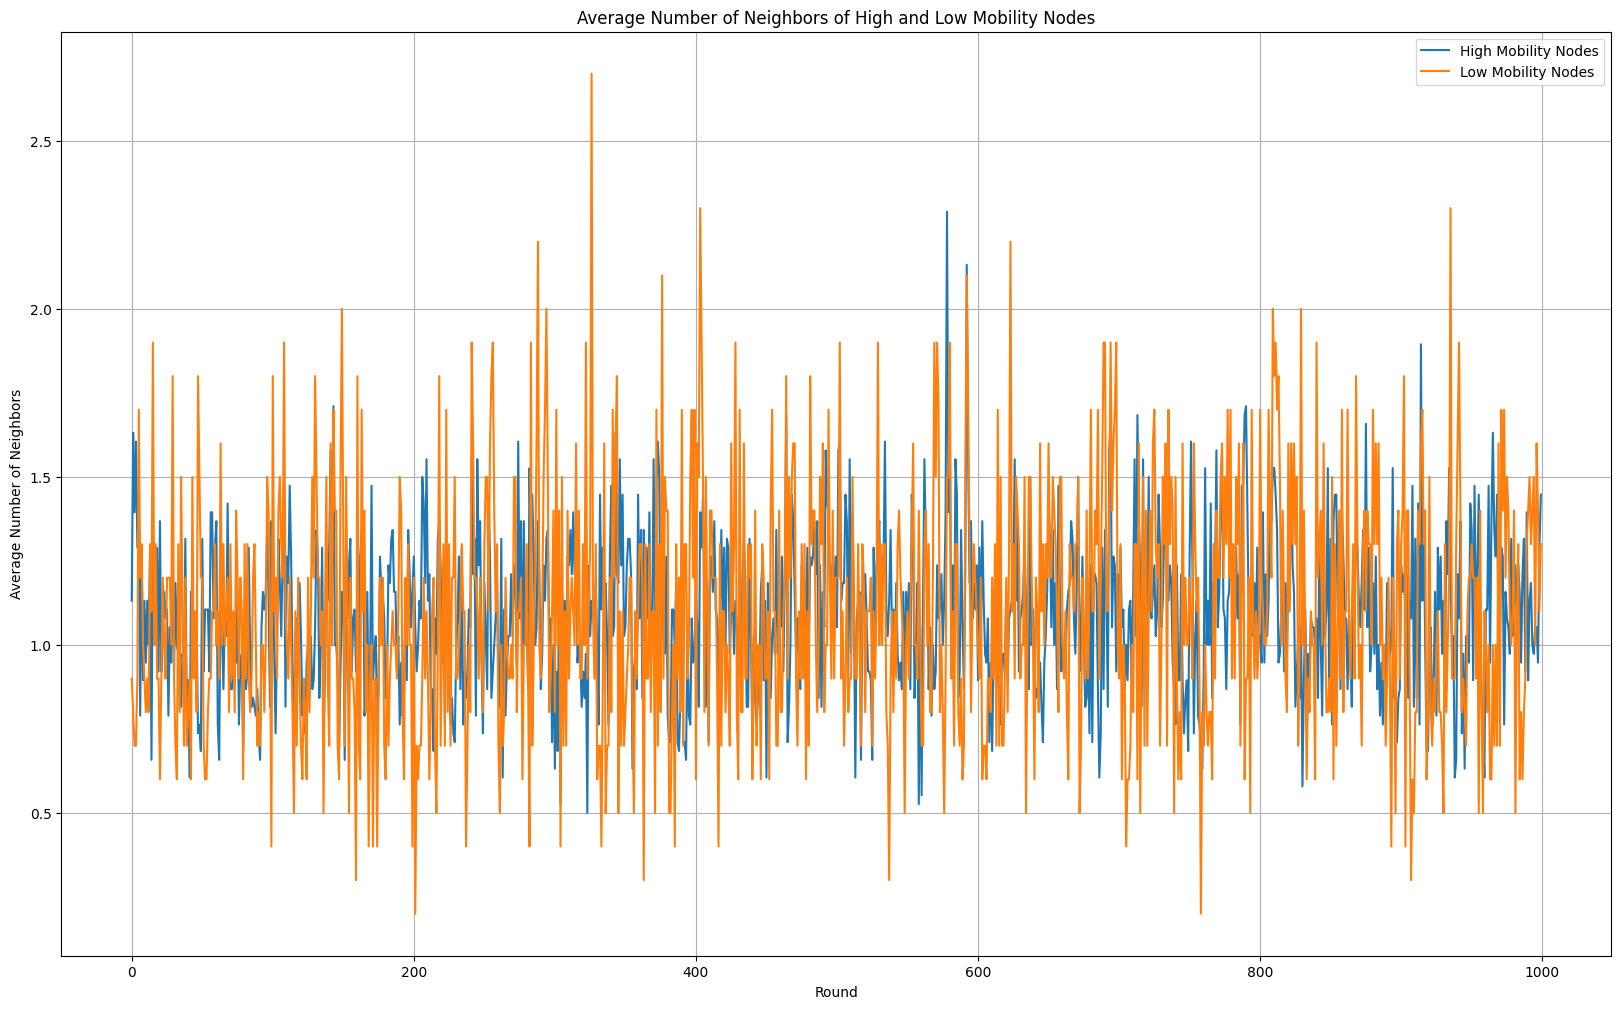

In [2]:
plt.figure(figsize=(20, 12))

average_num_neighbors_high_mobility = [np.mean([len(high_mobility_neighbors[i][node.uid]) for node in high_mobility_nodes(g)]) for i, g in enumerate(graphs)]
average_num_neighbors_low_mobility = [np.mean([len(low_mobility_neighbors[i][node.uid]) for node in low_mobility_nodes(g)]) for i, g in enumerate(graphs)]

print(average_num_neighbors_high_mobility)
print(average_num_neighbors_low_mobility)

plt.plot(average_num_neighbors_high_mobility, label="High Mobility Nodes")
plt.plot(average_num_neighbors_low_mobility, label="Low Mobility Nodes")

plt.xlabel("Round")
plt.ylabel("Average Number of Neighbors")
plt.title("Average Number of Neighbors of High and Low Mobility Nodes")
plt.legend()
plt.grid(True)
plt.show()


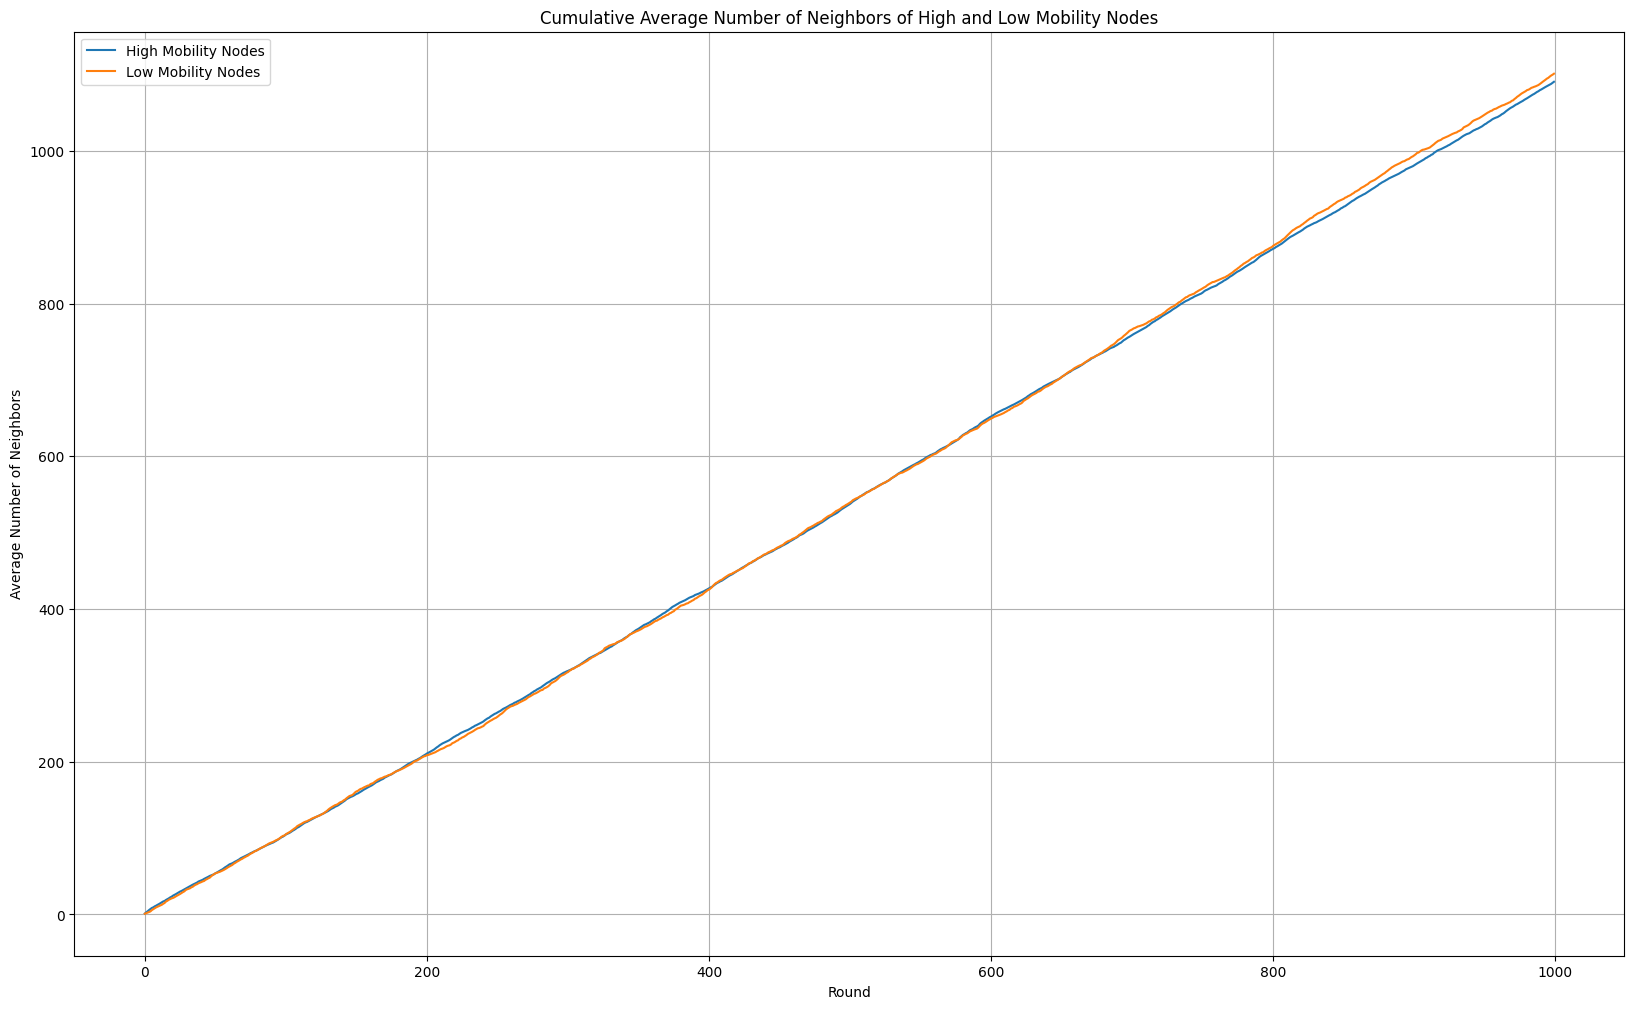

In [3]:
cumulative_num_neighbors_high_mobility = np.cumsum(np.array(average_num_neighbors_high_mobility))
cumulative_num_neighbors_low_mobility = np.cumsum(np.array(average_num_neighbors_low_mobility))

plt.figure(figsize=(20, 12))

plt.plot(cumulative_num_neighbors_high_mobility, label="High Mobility Nodes")
plt.plot(cumulative_num_neighbors_low_mobility, label="Low Mobility Nodes")

plt.xlabel("Round")
plt.ylabel("Average Number of Neighbors")
plt.title("Cumulative Average Number of Neighbors of High and Low Mobility Nodes")
plt.legend()
plt.grid(True)


In [4]:
from decentralizepy.graphs.MobilityNode import MobilityNode


def get_node_distance_travelled(node: MobilityNode):
    return np.linalg.norm(np.array(node.pos_vec) - np.array(node.previous_pos_vec))

high_mobility_nodes_distances = [np.mean([get_node_distance_travelled(node) for node in high_mobility_nodes(g)]) for g in graphs]
low_mobility_nodes_distances = [np.mean([get_node_distance_travelled(node) for node in low_mobility_nodes(g)]) for g in graphs]
print(high_mobility_nodes_distances)
print(low_mobility_nodes_distances)

cum_high_mobility_nodes_distances = np.cumsum(np.array(high_mobility_nodes_distances))
cum_low_mobility_nodes_distances = np.cumsum(np.array(low_mobility_nodes_distances))

plt.figure(figsize=(20, 12))

plt.plot(cum_high_mobility_nodes_distances, label="High Mobility Nodes")
plt.plot(cum_low_mobility_nodes_distances, label="Low Mobility Nodes")

plt.xlabel("Round")
plt.ylabel("Average Distance Travelled")
plt.title("Cumulative Average Distance Travelled by High and Low Mobility Nodes")
plt.legend()
plt.show()

AttributeError: 'MobilityNode' object has no attribute 'previous_pos_vec'

In [ ]:
average_high_mobility_velocity = [np.mean([node.velocity for node in high_mobility_nodes(g)]) for g in graphs][0]
average_low_mobility_velocity = [np.mean([node.velocity for node in low_mobility_nodes(g)]) for g in graphs][0]

print("Average High Mobility Velocity:", average_high_mobility_velocity)
print("Average Low Mobility Velocity:", average_low_mobility_velocity)

Average High Mobility Velocity: 92.36118743506434
Average Low Mobility Velocity: 17.410183343706272
